In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

savedir = "../data/processed"

In [3]:
file_path = os.path.join(savedir, "AccessibilityEdges.csv")
accessibility = pd.read_csv(file_path)

In [4]:
file_path = os.path.join(savedir, "SA2PopulationData2016.csv")
population = pd.read_csv(file_path)

### Data insights

In [5]:
population.head()

,SA2_CODE_2016,SA2_NAME_2016,SA2_5DIG16,AREA_SQKM,NR_OF_PEOPLE_2016,NR_OF_PEOPLE_2016_%,POPULATION_DENSITY_2016
0,101021007,Braidwood,11007,3418.4,3945,0.02,1.154049
1,101021008,Karabar,11008,7.0,8615,0.04,1230.714286
2,101021009,Queanbeyan,11009,4.8,11235,0.05,2340.625000
3,101021010,Queanbeyan - East,11010,13.0,5049,0.02,388.384615
4,101021011,Queanbeyan Region,11011,3054.4,17435,0.07,5.708159


In [6]:
accessibility.groupby('SA2_5DIG').sum()['accessible']

SA2_5DIG
11008    9
11009    9
11010    9
11011    1
11012    9
        ..
91002    0
91003    0
91004    0
99499    0
99799    0
Name: accessible, Length: 2309, dtype: int64

In [7]:
accessibility_per_sa = accessibility.groupby('SA2_5DIG').sum()['accessible'].to_list()

In [8]:
accessibility.groupby('SA2_5DIG').sum().loc[accessibility.groupby('SA2_5DIG').sum()['accessible']==100]

,hospital_ID,accessible,further_than_2h
SA2_5DIG,,,
21132,511566,100,850
21134,511566,100,855
21146,511566,100,855
21147,511566,100,855
21150,511566,100,855
21165,511566,100,855
21195,511566,100,856


In [9]:
from collections import Counter
counter_obj = Counter(accessibility_per_sa)
counter_obj

Counter({9: 119,
         1: 276,
         0: 270,
         2: 197,
         3: 106,
         6: 87,
         5: 106,
         7: 31,
         8: 63,
         4: 58,
         10: 25,
         11: 13,
         60: 6,
         54: 11,
         41: 3,
         57: 8,
         14: 19,
         12: 39,
         27: 21,
         44: 9,
         37: 36,
         51: 4,
         35: 37,
         24: 15,
         31: 33,
         34: 30,
         22: 8,
         62: 5,
         63: 2,
         70: 6,
         61: 5,
         56: 5,
         66: 5,
         78: 14,
         80: 6,
         71: 6,
         68: 6,
         77: 4,
         75: 5,
         73: 8,
         74: 5,
         55: 9,
         53: 3,
         59: 5,
         50: 9,
         58: 3,
         67: 8,
         84: 4,
         69: 8,
         82: 5,
         81: 11,
         76: 12,
         65: 9,
         72: 8,
         85: 7,
         91: 7,
         86: 7,
         87: 7,
         83: 7,
         92: 2,
         79: 6,
    

In [10]:
accessibility_per_sa_df = accessibility.groupby('SA2_5DIG').sum()[['accessible']].reset_index(drop=False)
accessibility_per_sa_df

,SA2_5DIG,accessible
0,11008,9
1,11009,9
2,11010,9
3,11011,1
4,11012,9
...,...,...
2304,91002,0
2305,91003,0
2306,91004,0
2307,99499,0


### Merge Population and Accessibility Data

In [11]:
population['SA2_5DIG16'] = population['SA2_5DIG16'].astype(str)
accessibility_per_sa_df['SA2_5DIG'] = accessibility_per_sa_df['SA2_5DIG'].astype(str)
new_df = pd.merge(accessibility_per_sa_df, population, how='left', left_on='SA2_5DIG', right_on='SA2_5DIG16')

In [12]:
list(new_df.columns)

['SA2_5DIG',
 'accessible',
 'SA2_CODE_2016',
 'SA2_NAME_2016',
 'SA2_5DIG16',
 'AREA_SQKM',
 'NR_OF_PEOPLE_2016',
 'NR_OF_PEOPLE_2016_%',
 'POPULATION_DENSITY_2016']

### Visualizations

In [13]:
bin_edges = range(0,int(max(new_df['NR_OF_PEOPLE_2016'])), 1000)
new_df['bins'] = pd.cut(new_df['NR_OF_PEOPLE_2016'], bins=bin_edges)
binned_averages = new_df.groupby('bins')['accessible'].mean()

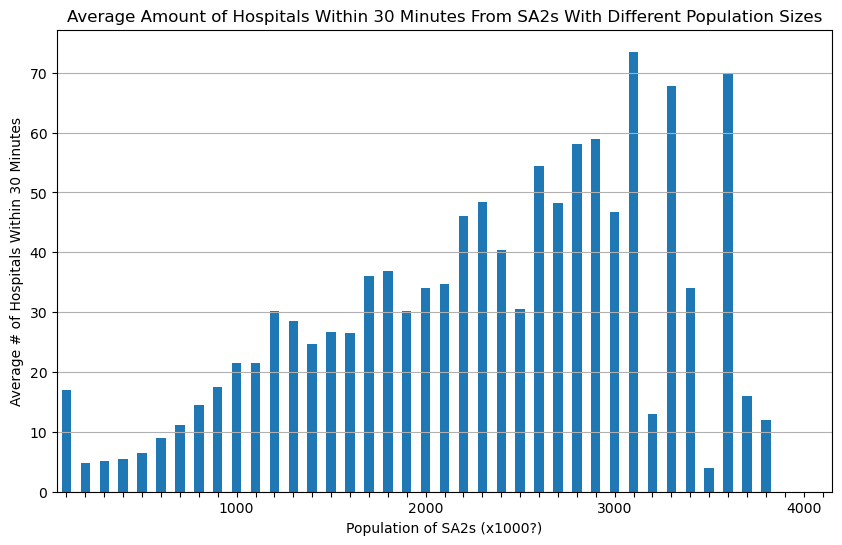

In [14]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
binned_averages.plot(kind='bar', ax=ax)

# Set custom x-axis tick labels

labels = [10, 20, 30, 40]
custom_ticks = []
for i in range(41):
    tick = ''
    if i+1 in labels:
        tick = (i+1)*100
    custom_ticks += [tick]
ax.set_xticklabels(custom_ticks, rotation=0)

# Set labels and title
ax.set_xlabel('Population of SA2s')
ax.set_ylabel('Average # of Hospitals Within 30 Minutes')
ax.set_title('Average Amount of Hospitals Within 30 Minutes From SA2s With Different Population Sizes')
ax.grid(True, axis='y')

# Show the plot
plt.show()

In [18]:
bin_edges = range(0,int(max(new_df['POPULATION_DENSITY_2016'])), 500)
new_df['bins'] = pd.cut(new_df['POPULATION_DENSITY_2016'], bins=bin_edges)
binned_averages = new_df.groupby('bins')['accessible'].mean()

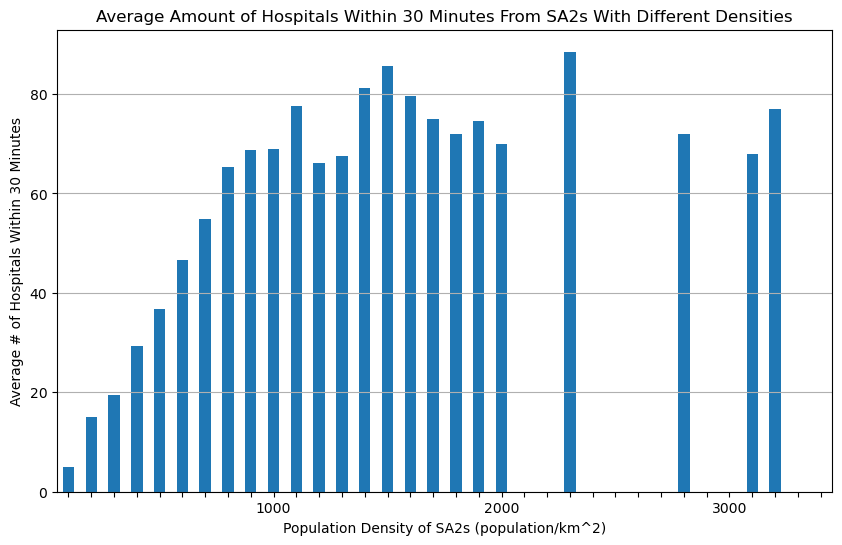

In [21]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
binned_averages.plot(kind='bar', ax=ax)

# Set custom x-axis tick labels

labels = [10, 20, 30]
custom_ticks = []
for i in range(34):
    tick = ''
    if i+1 in labels:
        tick = (i+1)*100
    custom_ticks += [tick]
ax.set_xticklabels(custom_ticks, rotation=0)

# Set labels and title
ax.set_xlabel('Population Density of SA2s (population/km^2)')
ax.set_ylabel('Average # of Hospitals Within 30 Minutes')
ax.set_title('Average Amount of Hospitals Within 30 Minutes From SA2s With Different Densities')
ax.grid(True, axis='y')

# Show the plot
plt.show()

<AxesSubplot:xlabel='POPULATION_DENSITY_2016', ylabel='accessible'>

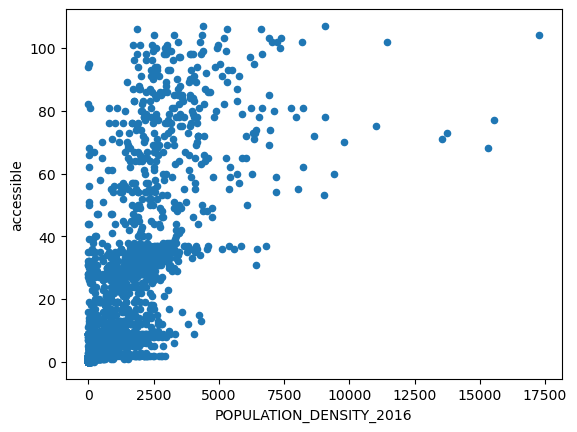

In [17]:
new_df.plot.scatter('POPULATION_DENSITY_2016', 'accessible')

### Summary info

In [38]:
amount_SA2_no_hospitals = len(new_df.loc[new_df['accessible']==0, 'SA2_5DIG'])
total_amount_SA2 = len(new_df)
percentage_SA2_no_hospital = (int(amount_SA2_no_hospitals)/int(total_amount_SA2))*100
people_no_hospital = new_df.loc[new_df['accessible']==0, 'NR_OF_PEOPLE_2016'].sum()
total_people = new_df['NR_OF_PEOPLE_2016'].sum()
percentage_people_no_hospital = (int(people_no_hospital)/int(total_people))*100
print(" Amount of SA2s that do not have a hospital within 30 minutes: " + str(int(amount_SA2_no_hospitals))+ "\n",
      "Total amount of SA2 in Australia: " + str(int(total_amount_SA2)) + "\n",
      "Percentage of SA2 without accessible hospital in Australia: " + str(int(percentage_SA2_no_hospital)) + "\n\n",
      "Amount of people that do not have a hospital within 30 minutes: " + str(int(people_no_hospital)) + "\n",
      "Total amount of people in Australia: " + str(int(total_people)) + "\n",
      "Percentage of people without accessible hospital in Australia: " + str(int(percentage_people_no_hospital)) + "\n",
      )

 Amount of SA2s that do not have a hospital within 30 minutes: 270
 Total amount of SA2 in Australia: 2309
 Percentage of SA2 without accessible hospital in Australia: 11

 Amount of people that do not have a hospital within 30 minutes: 1118880
 Total amount of people in Australia: 24202256
 Percentage of people without accessible hospital in Australia: 4



In [25]:
new_df.loc[new_df['accessible']==0, 'NR_OF_PEOPLE_2016'].sum()

1118880.0

In [26]:
new_df['NR_OF_PEOPLE_2016'].sum()

24202256.0

In [27]:
20/100

0.2